#### Eddies -> circular currents of water. The swirling motion of eddies in the ocean cause nutrients that are normally found in colder, deeper waters to come to the surface.

#### Tier1 -> summary of the dataset characteristics, key strengths, key weakness, known issues, fitness for purpose

In [191]:
#Import libraries

import os
import numpy as np
import netCDF4 as nc
import matplotlib.pyplot as plt
import xarray as xr
import matplotlib
from pathlib import Path
%matplotlib inline
from PIL import Image
from shapely.geometry import Polygon

plt.rcParams["figure.figsize"] = 12, 8

In [2]:
current_path = os.getcwd()
current_path

'/home/luisfigueiredo/JUNO/notebooks'

In [3]:
aviso_folder = os.path.join(current_path,"../data/AVISO")
aviso_folder

'/home/luisfigueiredo/JUNO/notebooks/../data/AVISO'

In [4]:
nc_path = os.path.join(aviso_folder, "Eddy_trajectory_nrt_3.2exp_cyclonic_20180101_20220829.nc")
ds = nc.Dataset(nc_path)
data = xr.load_dataset(nc_path)

In [5]:
print(ds)

<class 'netCDF4._netCDF4.Dataset'>
root group (NETCDF4 data model, file format HDF5):
    Metadata_Conventions: Unidata Dataset Discovery v1.0
    comment: Surface product; mesoscale eddies
    creator_email: aviso@altimetry.fr
    creator_url: https://www.aviso.altimetry.fr
    date_created: 2022-10-06T06:36:20Z
    framework_used: https://github.com/AntSimi/py-eddy-tracker
    framework_version: v3.6.0
    input_maps_processing: DUACS DT2018 until 2021-12-07, DUACS DT2021 since 2021-12-08
    input_product_reference: https://www.aviso.altimetry.fr/en/data/products/value-added-products/global-mesoscale-eddy-trajectory-product.html
    institution: CLS/CNES in collaboration with IMEDEA
    license: https://www.aviso.altimetry.fr/fileadmin/documents/data/License_Aviso.pdf
    product_version: 3.2exp
    project: SSALTO/DUACS
    standard_name_vocabulary: NetCDF Climate and Forecast (CF) Metadata Convention Standard Name Table
    summary: This dataset contains eddy atlas from all-satell

In [6]:
data

<xarray.Dataset>
Dimensions:                        (NbSample: 20, obs: 5944501)
Dimensions without coordinates: NbSample, obs
Data variables: (12/27)
    amplitude                      (obs) float32 0.0437 0.0716 ... 0.0284 0.0396
    effective_area                 (obs) float32 6.781e+09 ... 3.221e+09
    effective_contour_height       (obs) float32 0.112 0.13 0.11 ... -0.47 -0.46
    effective_contour_latitude     (obs, NbSample) float32 33.05 33.12 ... 27.88
    effective_contour_longitude    (obs, NbSample) float32 142.1 142.0 ... 279.6
    effective_contour_shape_error  (obs) float32 60.0 45.0 48.5 ... 52.5 56.0
    ...                             ...
    speed_contour_longitude        (obs, NbSample) float32 142.1 141.9 ... 279.6
    speed_contour_shape_error      (obs) float32 33.0 30.0 34.5 ... 51.5 56.0
    speed_radius                   (obs) float32 3.575e+04 3.85e+04 ... 3.68e+04
    time                           (obs) datetime64[ns] 2018-01-01 ... 2022-0...
    track                          (obs) uint32 0 0 0 0 ... 135109 135109 135109
    uavg_profile                   (obs, NbSample) float32 0.1932 ... 0.5142
Attributes: (12/19)
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    creator_email:             aviso@altimetry.fr
    creator_url:               https://www.aviso.altimetry.fr
    date_created:              2022-10-06T06:36:20Z
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    ...                        ...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   This dataset contains eddy atlas from all-sate...
    time_coverage_duration:    P1702D
    time_coverage_end:         2022-08-29T00:00:00Z
    time_coverage_start:       2018-01-01T00:00:00Z
    title:                     Mesoscale Cyclonic Eddies in Altimeter Observa...

In [7]:
#Existem 6 milhoes de observaçoes de vortices e para cada observação existe um dado valor de cada uma destas
# 27 variaveis   (todas as variaveis têm 6 milhoes de valores)
data['track'].values.shape

(5944501,)

### Plot histograms with Longitude and Latitude Values

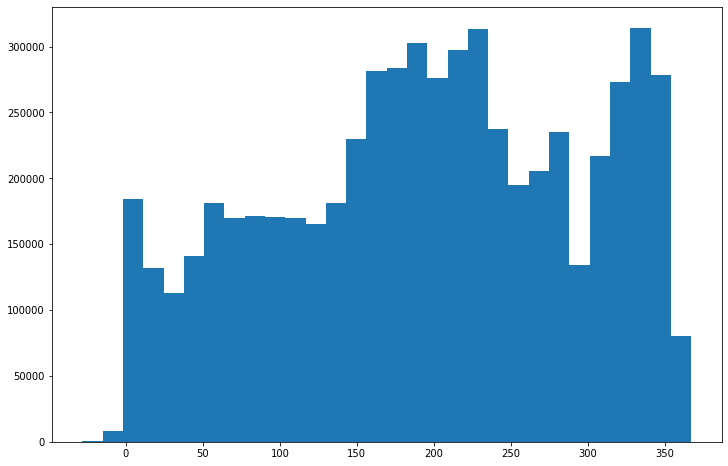

In [8]:
plt.hist(data['longitude'].values, bins = 30);

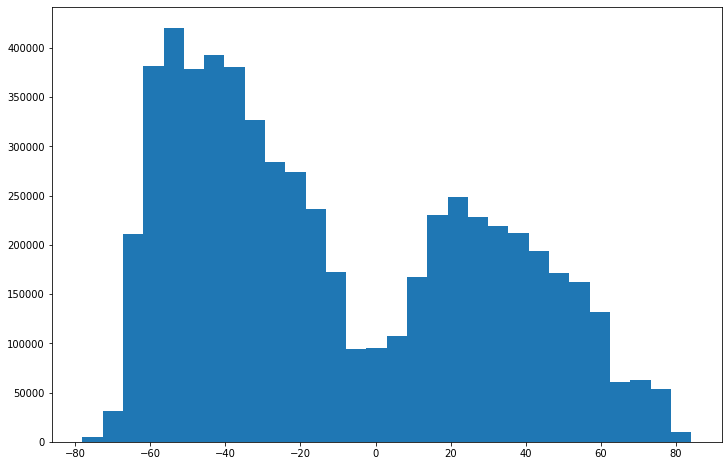

In [9]:
plt.hist(data['latitude'].values, bins = 30);

In [192]:
#Criar boolean para os limites de latitude e longitude que quero
bool_lat = (data['latitude'].values > 35) & (data['latitude'].values < 43)
bool_lon = (data['longitude'].values > 330) & (data['longitude'].values < 352)

bool_time = (data['time'].values == np.datetime64('2022-08-29T00:00:00.000000000'))

In [193]:
#track is the trajectory identification number -> permite-nos rastrear um dado vortice
tracking = data['track'].values[np.logical_and(bool_lon, bool_lat, bool_time)]

In [194]:
tracking

#Naquelas coordenadas foram identificadas 875 vortices diferentes, sendo que como o vortice se vai movendo com
# o tempo,foram detetados cerca de 41000 diferentes possiveis posiçoes destes 875 vortices

array([   173,    173,    173, ..., 134979, 134979, 134979], dtype=uint32)

In [204]:
#Now we will use one of those vortices that were identified in those coordinates above 
#slice da latitude e longitude baseado no nr do vortice (track)

lat_track = data['latitude'].values[(data['track'] == 134979)]
lon_track = data['longitude'].values[(data['track'] == 134979)]
area_track = data['effective_area'].values[(data['track'] == 134979)]
time_track = data['time'].values[(data['track'] == 134979)]

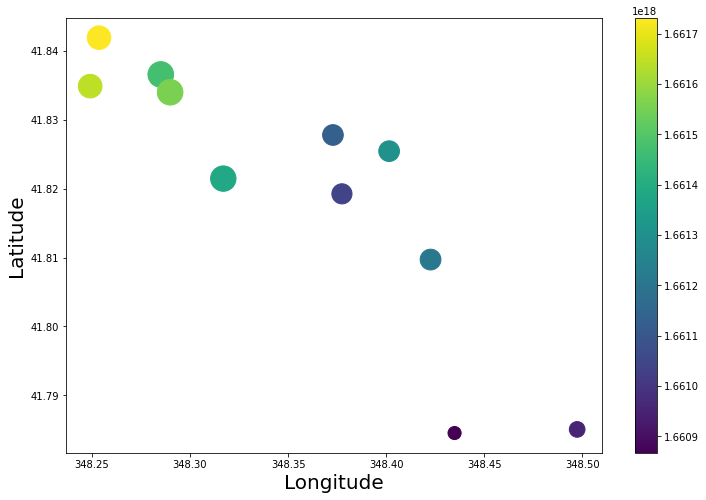

In [206]:
plt.scatter(lon_track, lat_track,s = area_track/10000000, c=time_track)
plt.colorbar();
plt.xlabel('Longitude', fontsize=20);
plt.ylabel('Latitude', fontsize=20);

In [ ]:
#separar por dias e plotar os vortices com o mapa para determinado dia, com mapa (basemap)

In [15]:
#Criar boolean para os limites de latitude e longitude que quero
bool_lat2 = (data['latitude'].values > 35) & (data['latitude'].values < 43)
bool_lon2 = (data['longitude'].values >150) & (data['longitude'].values < 170)

bool_time2 = (data['time'].values > np.datetime64('2022-08-20T00:00:00.000000000'))

In [16]:
bool_time2
count = np.count_nonzero(bool_time2 == True)     
count

27059

In [17]:
#Como estamos a fazer um slicing atraves de 3 booleans não podemos usar o np.logical_and
tracking2 = data['track'].values[(data['latitude'].values > 35) & (data['latitude'].values < 45) & (data['longitude'].values >150) & (data['longitude'].values < 170) & (data['time'].values > np.datetime64('2022-08-20T00:00:00.000000000'))]
tracking2

array([108366, 108366, 108366, 108366, 108366, 108366, 108366, 108366,
       108366, 126109, 126109, 126109, 126109, 126109, 126109, 126109,
       126109, 126109, 126609, 126609, 126609, 126609, 126609, 126609,
       126609, 126609, 126609, 130040, 130040, 130040, 130040, 130040,
       130040, 130040, 130040, 130040, 130104, 130104, 130104, 130104,
       130104, 130104, 130104, 130104, 130104, 130915, 130915, 130915,
       130915, 130915, 130915, 130915, 130915, 130915, 131886, 131886,
       131886, 131886, 131886, 131886, 131886, 132021, 132021, 132021,
       132021, 132021, 132021, 132021, 132021, 132021, 132157, 132157,
       132157, 132157, 132157, 132157, 132223, 132223, 132223, 132327,
       132327, 132327, 132327, 132327, 132710, 132710, 132710, 132710,
       132710, 132710, 132710, 132710, 132710, 133119, 133119, 133119,
       133119, 133119, 133119, 133119, 133119, 133119, 133279, 133292,
       133292, 133292, 133292, 133292, 133292, 133292, 133292, 133292,
      

In [18]:
#Now we will use one of those vortices that were identified in those coordinates above 
#slice da latitude e longitude baseado no nr do vortice (track)

lat_track2 = data['latitude'].values[(data['track'] == 134372)]
lon_track2 = data['longitude'].values[(data['track'] == 134372)]
area_track2 = data['effective_area'].values[(data['track'] == 134372)]
#time_track2 = data['time'].values[(data['track'] == 134985)]

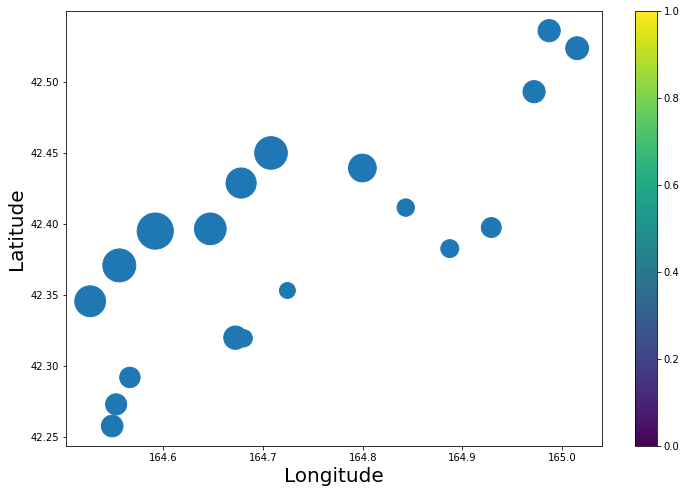

In [19]:
plt.scatter(lon_track2, lat_track2, s = area_track2/10000000)
plt.colorbar()
plt.xlabel('Longitude', fontsize=20);
plt.ylabel('Latitude', fontsize=20);

## Make a Map in Python using Basemap

Como o basemap aceita os valores de longitude entre -180 e 180 temos de converter os valores de longitude do array de tracking para a gama [-180, 180]:

    lon_track2 = lon_track2-180   (algo do genero)

In [20]:
lon_track2 = lon_track2-180

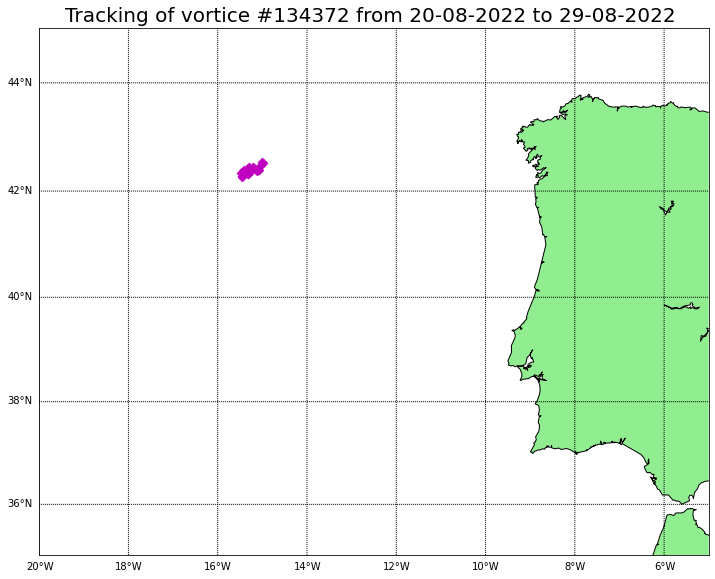

In [21]:
from mpl_toolkits.basemap import Basemap
import matplotlib.pyplot as plt

fig = plt.figure(figsize=(12,10))

m = Basemap(projection='mill',
           llcrnrlat = 35,                      #35
           llcrnrlon = -20,                     #-20
           urcrnrlat = 45,                      # 45
           urcrnrlon = -5,                      #-5
           resolution = 'i')

m.drawcoastlines()
m.fillcontinents(color = 'lightgreen')   #por zonas continentais a verde
#m.etopo()      #topografia


lons = list(lon_track2)
lats = list(lat_track2)

x, y = m(lons, lats)
m.scatter(x, y, marker='D',color='m')

m.drawparallels(np.arange(-90,90,2), labels = [True, False, False, False])
m.drawmeridians(np.arange(-180,180, 2), labels=[0,0,0,1])

plt.title('Tracking of vortice #134372 from 20-08-2022 to 29-08-2022 ', fontsize=20)

plt.show()

## ---------------- Plot a Polygon of a Eddie with its center in the Basemap ------------------------

In [22]:
data

<xarray.Dataset>
Dimensions:                        (NbSample: 20, obs: 5944501)
Dimensions without coordinates: NbSample, obs
Data variables: (12/27)
    amplitude                      (obs) float32 0.0437 0.0716 ... 0.0284 0.0396
    effective_area                 (obs) float32 6.781e+09 ... 3.221e+09
    effective_contour_height       (obs) float32 0.112 0.13 0.11 ... -0.47 -0.46
    effective_contour_latitude     (obs, NbSample) float32 33.05 33.12 ... 27.88
    effective_contour_longitude    (obs, NbSample) float32 142.1 142.0 ... 279.6
    effective_contour_shape_error  (obs) float32 60.0 45.0 48.5 ... 52.5 56.0
    ...                             ...
    speed_contour_longitude        (obs, NbSample) float32 142.1 141.9 ... 279.6
    speed_contour_shape_error      (obs) float32 33.0 30.0 34.5 ... 51.5 56.0
    speed_radius                   (obs) float32 3.575e+04 3.85e+04 ... 3.68e+04
    time                           (obs) datetime64[ns] 2018-01-01 ... 2022-0...
    track                          (obs) uint32 0 0 0 0 ... 135109 135109 135109
    uavg_profile                   (obs, NbSample) float32 0.1932 ... 0.5142
Attributes: (12/19)
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    creator_email:             aviso@altimetry.fr
    creator_url:               https://www.aviso.altimetry.fr
    date_created:              2022-10-06T06:36:20Z
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    ...                        ...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   This dataset contains eddy atlas from all-sate...
    time_coverage_duration:    P1702D
    time_coverage_end:         2022-08-29T00:00:00Z
    time_coverage_start:       2018-01-01T00:00:00Z
    title:                     Mesoscale Cyclonic Eddies in Altimeter Observa...

In [223]:
x = data['effective_contour_longitude'].values[(data['track'] == 134372)][0] - 180
y = data['effective_contour_latitude'].values[(data['track'] == 134372)][0] 

In [224]:
eddie_lons = list(x)
eddie_lats = list(y)

In [225]:
poly = Polygon(zip(x,y))

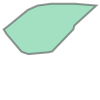

In [226]:
poly

In [227]:
eddie_centro_x = [poly.centroid.coords[0][0]]  #coordinates of the centroid
eddie_centro_y = [poly.centroid.coords[0][1]]

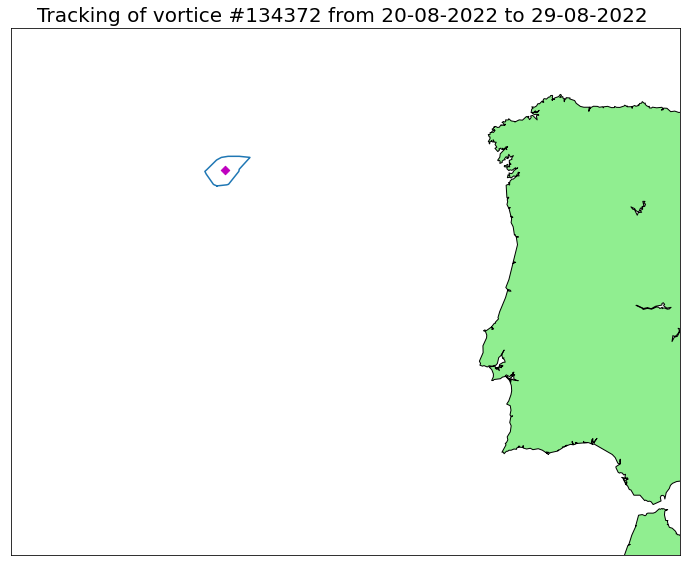

In [228]:


fig = plt.figure(figsize=(12,10))

m = Basemap(projection='mill',
           llcrnrlat = 35,                      #35
           llcrnrlon = -20,                     #-20
           urcrnrlat = 45,                      # 45
           urcrnrlon = -5,                      #-5
           resolution = 'i')

m.drawcoastlines()
m.fillcontinents(color = 'lightgreen')   #por zonas continentais a verde
#m.etopo()      #topografia


x1, y1 = m(eddie_lons, eddie_lats)
centro_x, centro_y = m(eddie_centro_x, eddie_centro_y)
m.plot(x1, y1)
m.scatter(centro_x, centro_y, marker='D',color='m')

#m.drawparallels(np.arange(-90,90,2), labels = [True, False, False, False])
#m.drawmeridians(np.arange(-180,180, 2), labels=[0,0,0,1])

plt.title('Tracking of vortice #134372 from 20-08-2022 to 29-08-2022 ', fontsize=20)
plt.show()

In [214]:
data

<xarray.Dataset>
Dimensions:                        (NbSample: 20, obs: 5944501)
Dimensions without coordinates: NbSample, obs
Data variables: (12/27)
    amplitude                      (obs) float32 0.0437 0.0716 ... 0.0284 0.0396
    effective_area                 (obs) float32 6.781e+09 ... 3.221e+09
    effective_contour_height       (obs) float32 0.112 0.13 0.11 ... -0.47 -0.46
    effective_contour_latitude     (obs, NbSample) float32 33.05 33.12 ... 27.88
    effective_contour_longitude    (obs, NbSample) float32 142.1 142.0 ... 279.6
    effective_contour_shape_error  (obs) float32 60.0 45.0 48.5 ... 52.5 56.0
    ...                             ...
    speed_contour_longitude        (obs, NbSample) float32 142.1 141.9 ... 279.6
    speed_contour_shape_error      (obs) float32 33.0 30.0 34.5 ... 51.5 56.0
    speed_radius                   (obs) float32 3.575e+04 3.85e+04 ... 3.68e+04
    time                           (obs) datetime64[ns] 2018-01-01 ... 2022-0...
    track                          (obs) uint32 0 0 0 0 ... 135109 135109 135109
    uavg_profile                   (obs, NbSample) float32 0.1932 ... 0.5142
Attributes: (12/19)
    Metadata_Conventions:      Unidata Dataset Discovery v1.0
    comment:                   Surface product; mesoscale eddies
    creator_email:             aviso@altimetry.fr
    creator_url:               https://www.aviso.altimetry.fr
    date_created:              2022-10-06T06:36:20Z
    framework_used:            https://github.com/AntSimi/py-eddy-tracker
    ...                        ...
    standard_name_vocabulary:  NetCDF Climate and Forecast (CF) Metadata Conv...
    summary:                   This dataset contains eddy atlas from all-sate...
    time_coverage_duration:    P1702D
    time_coverage_end:         2022-08-29T00:00:00Z
    time_coverage_start:       2018-01-01T00:00:00Z
    title:                     Mesoscale Cyclonic Eddies in Altimeter Observa...

In [249]:
x = data['effective_contour_longitude'].values[(data['track'] == 134372)][0] - 180
y = data['effective_contour_latitude'].values[(data['track'] == 134372)][0] 

In [250]:
eddie_lons = list(x)
eddie_lats = list(y)

In [252]:
centro_x = []
centro_y = []
for i in range(len(data['effective_contour_longitude'].values[(data['track'] == 134372)])):
    
    eddie_x = data['effective_contour_longitude'].values[(data['track'] == 134372)][i] - 180
    eddie_y = data['effective_contour_latitude'].values[(data['track'] == 134372)][i] 
    
    poly = Polygon(zip(eddie_x,eddie_y))
    
    centro_x.append(poly.centroid.coords[0][0])  #coordinates of the centroid
    centro_y.append(poly.centroid.coords[0][1])
    

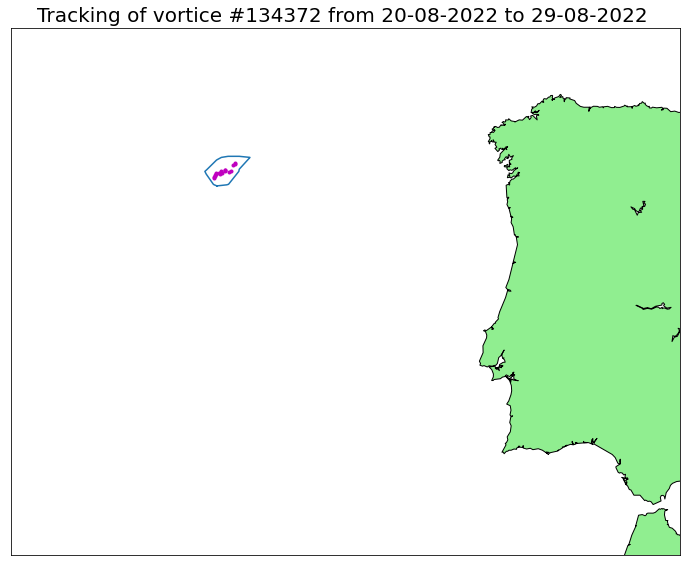

In [255]:

fig = plt.figure(figsize=(12,10))

m = Basemap(projection='mill',
           llcrnrlat = 35,                      #35
           llcrnrlon = -20,                     #-20
           urcrnrlat = 45,                      # 45
           urcrnrlon = -5,                      #-5
           resolution = 'i')

m.drawcoastlines()
m.fillcontinents(color = 'lightgreen')   #por zonas continentais a verde
#m.etopo()      #topografia


x1, y1 = m(eddie_lons, eddie_lats)
eddies_centro_x, eddies_centro_y = m(centro_x, centro_y)
m.plot(x1, y1)
m.scatter(eddies_centro_x, eddies_centro_y, marker='.', color='m', linewidths=1)

#m.drawparallels(np.arange(-90,90,2), labels = [True, False, False, False])
#m.drawmeridians(np.arange(-180,180, 2), labels=[0,0,0,1])

plt.title('Tracking of vortice #134372 from 20-08-2022 to 29-08-2022 ', fontsize=20)
plt.show()